<a href="https://colab.research.google.com/github/Himansh-Shah/AudioClassification/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.0 MB/s eta 0:00:00


In [3]:
#Deep learning and machine learning modules
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split



#Used to processs audio data
import librosa
import librosa.display
import resampy

#Helps us visualize data
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd


import os


#MetaData
This serves as summary or the extra information about the dataset we are using non of this really affects the building of model. But we need to be completely aware of the data we are using.

In [12]:
bird_df = pd.read_csv("/content/drive/MyDrive/Data/Audio_Classification/Birds Voice.csv")
bird_df.head()

common_name             scientific_name                 recordist_name  \
0  Common Ostrich  Struthio camelus australis                  Frank Lambert   
1  Common Ostrich            Struthio camelus                   Jeremy Hegge   
2  Common Ostrich            Struthio camelus                   Jeremy Hegge   
3  Common Ostrich            Struthio camelus                  Derek Solomon   
4  Common Ostrich            Struthio camelus  Morioka Zoological Park ZOOMO   

  recording_length        Date                                     TYPE  \
0             0:53  2019-10-30                                     call   
1             0:26  2014-11-20                                     call   
2             0:04  2014-11-21                                     call   
3             0:11  2010-02-09                                     call   
4             1:47  2021-09-06  voice during egg laying, zoo collection   

      xc_id   Time       Country                           Download_link  
0  XC516153  08:05  South Africa  https://xeno-canto.org/516153/download  
1  XC208209  04:00  South Africa  https://xeno-canto.org/208209/download  
2  XC208128  06:00  South Africa  https://xeno-canto.org/208128/download  
3   XC46725  07:00  South Africa   https://xeno-canto.org/46725/download  
4  XC675445  17:00         Japan  https://xeno-canto.org/675445/download

In [13]:
#This is abit of data in metadata that has any kind of relavance to the problem we are solving the future scope of this project could be to include them in our features to predict the labels
bird_df = bird_df.drop(['Date', 'recordist_name','recording_length', 'xc_id','Download_link','TYPE','Time'], axis=1)
bird_df.describe()

common_name   scientific_name Country
count               2161              2161    2161
unique               114               219      39
top     Plain Chachalaca  Tinamus guttatus  Brazil
freq                  30                30     594

#Audio Data
This is the actual audio data. I selected a random audio file from the dataset and displayed its waveform using librosa and the audio can be played by clicking on play button(Done using ipd)

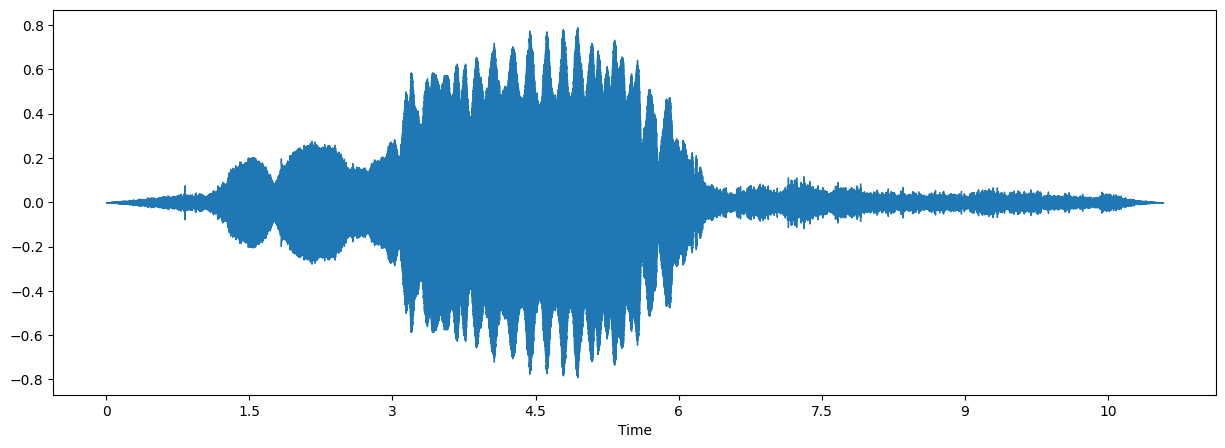

In [7]:
filename = '/content/drive/MyDrive/Data/Audio_Classification/Voice of Birds/Voice of Birds/Brazilian Tinamou_sound/Brazilian Tinamou12.mp3'
plt.figure(figsize = (15,5))
audio , sample_rate = librosa.load(filename)
librosa.display.waveshow(audio, sr= sample_rate)
ipd.Audio(filename)

#Tensors
Tensors are multidimensional np-array like structure. Before feeding the audio file to the model we will first convert them into tensors as show below.
The audio is converted into mel-frequency cepstral coefficient(MFCCS) features

In [9]:
audio , sample_rate = librosa.load(filename)
librosa.feature.mfcc(y=audio, sr =sample_rate)[0]

array([-498.12598, -498.12598, -492.58307, -475.01892, -458.16782,
       -439.1525 , -420.62   , -405.4701 , -395.14374, -389.38864,
       -378.3476 , -368.4206 , -361.43042, -352.6684 , -337.72195,
       -325.6358 , -325.9537 , -321.8973 , -309.62872, -302.1906 ,
       -292.30106, -290.274  , -294.318  , -291.7094 , -282.527  ,
       -270.82803, -268.63736, -267.54755, -265.6856 , -264.8016 ,
       -260.7284 , -256.3688 , -249.18416, -246.6836 , -242.9904 ,
       -224.72556, -226.86256, -244.43861, -244.1788 , -245.39732,
       -246.29451, -239.27654, -238.41129, -244.85797, -248.74692,
       -248.16008, -251.63895, -250.1394 , -247.66075, -251.43587,
       -247.17563, -250.33382, -251.6724 , -242.9524 , -248.73944,
       -244.54483, -241.68904, -243.98802, -245.73409, -246.1035 ,
       -248.87276, -251.60593, -252.05678, -249.6935 , -245.52681,
       -245.69829, -247.99992, -250.23993, -249.57559, -249.1329 ,
       -251.20978, -250.06241, -242.8803 , -243.32419, -244.27

#Final Form
The data was too big to be converted eveytime. Therefore i saved to converted the data into a pickle file. Below is the visualization of how the final data looks like

In [14]:
import pickle

# Open the file in binary mode
with open('/content/drive/MyDrive/Data/Variable/converted_variable.pkl', 'rb') as file:

	# Call load method to deserialze
	myvar = pickle.load(file)



metadata = pickle.loads(myvar)

In [15]:
metadata_df = pd.DataFrame(metadata, columns=["Tensor", "Labels"])
metadata_df

Tensor  \
0     [-292.25778, 79.14105, -69.43218, -15.776796, ...   
1     [-209.18692, 92.85317, -44.581, -2.5091066, -2...   
2     [-120.09011, 77.67051, -26.937946, 35.09762, -...   
3     [-154.5394, 73.99234, -63.638844, 4.540752, -2...   
4     [-206.09169, 76.77229, -47.625484, 38.417553, ...   
...                                                 ...   
2156  [-242.88806, 62.89085, -58.899864, 12.168685, ...   
2157  [-282.0615, 10.978386, -64.58603, -17.793783, ...   
2158  [-171.90819, 93.65975, -54.21476, -13.587225, ...   
2159  [-369.69077, 47.750366, -29.303461, 14.703401,...   
2160  [-234.54272, 15.991768, -64.94804, -10.695522,...   

                                                 Labels  
0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
2156  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2157  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2158  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2159  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2160  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[2161 rows x 2 columns]

#Shape of X and y

In [16]:
X = np.array(metadata_df['Tensor'].tolist())
y = np.array(metadata_df['Labels'].tolist())
X.shape , y.shape

((2161, 40), (2161, 114))

In [17]:
X[11].shape, y[11].shape

((40,), (114,))

Text(0.5, 1.0, 'Learning vs Loss')

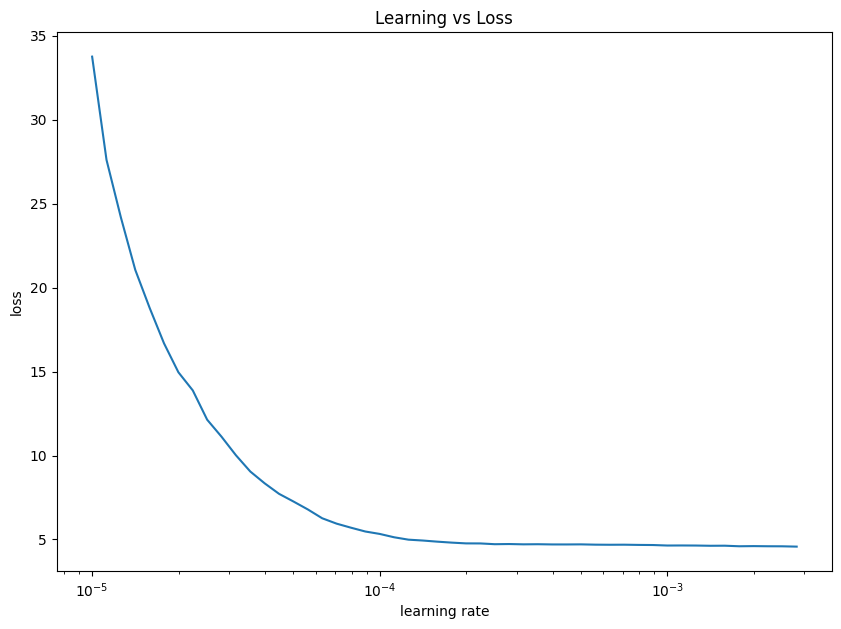

In [ ]:
lrs = 1e-5 * (10 ** (tf.range(50)/20))
plt.figure(figsize =(10,7))
plt.semilogx(lrs , history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning vs Loss")


Text(0.5, 1.0, 'Validation data Loss/Accuracy vs epochs')

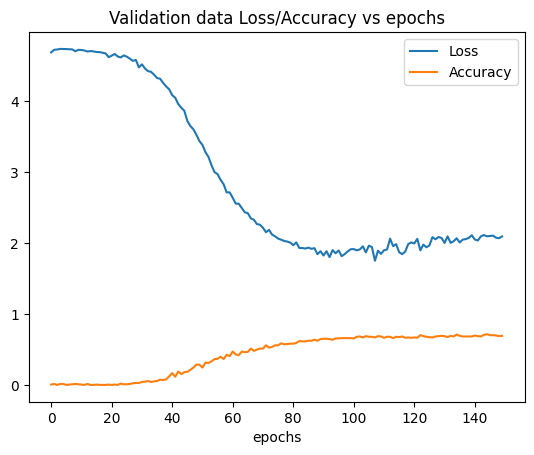

In [ ]:
plt.plot(history_df["val_loss"], label="Loss")
plt.plot(history_df["val_accuracy"], label="Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.title("Validation data Loss/Accuracy vs epochs")


Text(0.5, 1.0, 'Validation data Loss/Precision vs epochs')

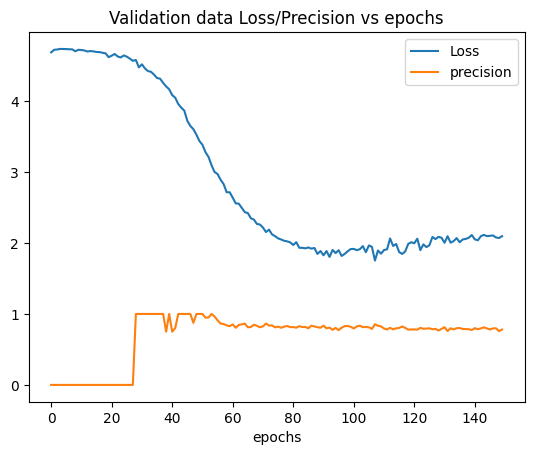

In [ ]:
# plt.figure(figsize=(10, 10))
plt.plot(history_df["val_loss"], label="Loss")
plt.plot(history_df["val_precision_1"], label="precision")
plt.xlabel("epochs")
plt.legend()
plt.title("Validation data Loss/Precision vs epochs")


Text(0.5, 1.0, 'Validation data Loss/recall vs epochs')

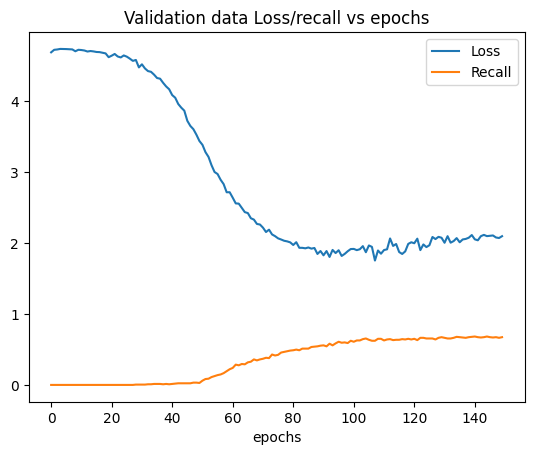

In [ ]:
plt.plot(history_df["val_loss"], label="Loss")
plt.plot(history_df["val_recall_1"], label="Recall")
plt.xlabel("epochs")
plt.legend()
plt.title("Validation data Loss/recall vs epochs")


Text(0.5, 1.0, 'Training of Final Model')

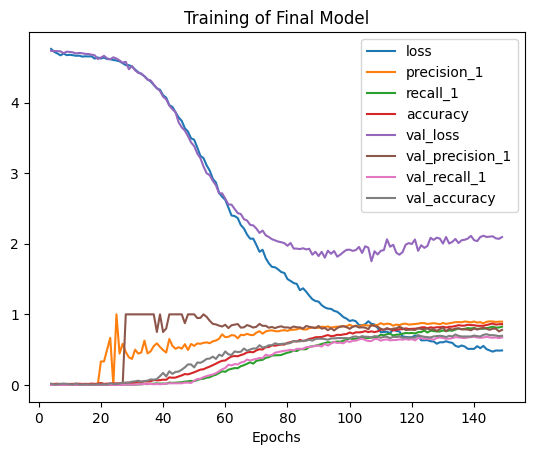

In [ ]:
pd.DataFrame(history.history).drop([0,1,2,3], axis=0).plot()
plt.xlabel("Epochs")
plt.title("Training of Final Model")


In [ ]:
y_preds = model.predict(X)
y_preds = y_preds.argmax(axis=1)
y_transformed_test = y.argmax(axis=1)
y_preds
make_confusion_matrix(y_preds , y_transformed_test, classes=species, figsize=(200, 160), text_size=5)


68/68 [==============================] - 2s 27ms/step


<ipython-input-35-c34b4668ab72>:10: RuntimeWarning: invalid value encountered in divide
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
